#  Прогнозирование заказов такси

<h1>Описание проекта</h1>

Компания такси собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час.

**Цель проекта:** построить модель, прогнозирующую количество заказов такси на следующий час. Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

**Задачи:**
1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.

<h1>Описание данных</h1>

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#1h-таймфрейм" data-toc-modified-id="1h-таймфрейм-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1h таймфрейм</a></span></li><li><span><a href="#1d-таймфрейм" data-toc-modified-id="1d-таймфрейм-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>1d таймфрейм</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>XGBRegressor</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li><li><span><a href="#Графическая-оценка-результатов" data-toc-modified-id="Графическая-оценка-результатов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Графическая оценка результатов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка

### Подключение библиотек

*Установим и загрузим необходимые библиотеки.*

In [1]:
# !pip install lightgbm -U
# !pip install catboost -U
# !pip install xgboost -U

In [2]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Загрузка данных

*Напишем функцию, которая будет считывать данные из csv-файла в датафрейм и сохранять их в соответствующую переменную.*

In [3]:
def read_csv(link_1, link_2):
    try:
        data = pd.read_csv(link_1, index_col=[0], parse_dates=[0])
    except:
        data = pd.read_csv(link_2, index_col=[0], parse_dates=[0])
    return data

*Считаем данные.*

In [4]:
data = read_csv('C:\\Users\\user\\Desktop\\jupiter_notebook\\analiz_vremennih_ryadov\\taxi.csv', '/datasets/taxi.csv')

### Изучение данных

*Выведем общую информацию о датасете.*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [6]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


*Проверим, расположены ли индексы в хронологическом порядке.*

In [7]:
data.index.is_monotonic

True

*Данные расположены в хронологическом порядке. Выполним ресемплирование данных по одному часу.*

In [8]:
data = data.resample('1H').sum()

In [9]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


*Выведем дату и время последнего наблюдения.*

In [10]:
data.index.max()

Timestamp('2018-08-31 23:00:00', freq='H')

### Вывод

В ходе выполнения данного шага работы были подключены необходимые библиотеки и загружены данные.

## Анализ

### 1h таймфрейм

*Изучим, как изменялось количество заказов в зависимости от времени. Для начала, выясним, как изменения происходят в течение дня*

In [11]:
decomposed_1h = seasonal_decompose(data)

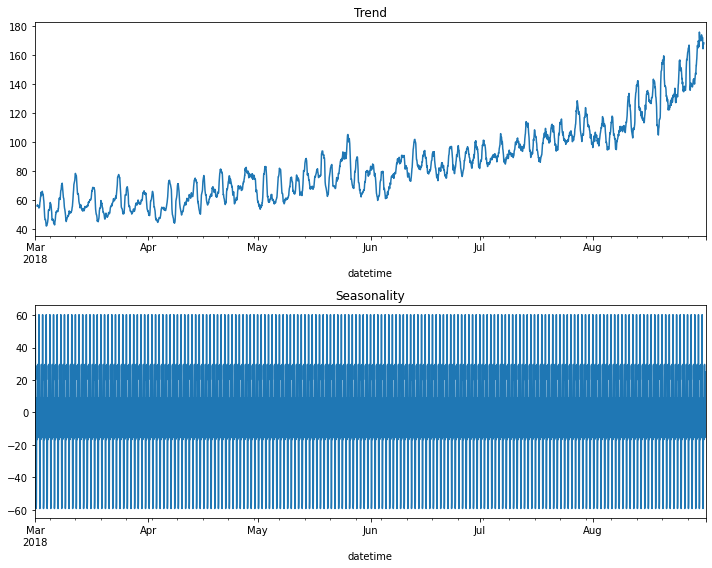

In [12]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
decomposed_1h.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(212)
decomposed_1h.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.tight_layout()

*Можем проследить тенденцию к увеличению количества заказов в течение рассматриваемого периода. Однако график сезонности нечитаем, рассмотрим часть этого графика.*

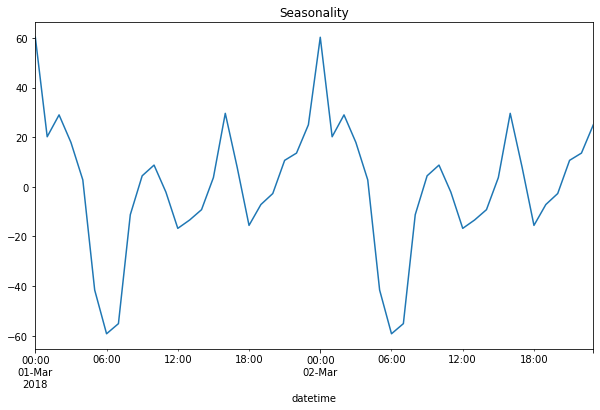

In [13]:
plt.figure(figsize=(10,6))
decomposed_1h.seasonal['2018-03-01':'2018-03-02'].plot(ax=plt.gca())
plt.title('Seasonality');

*Можно отметить три пика активности: в утреннее, вечернее и ночное время.*

### 1d таймфрейм

*Увеличим интервал ресемплирование до одного дня, изучим, как меняется активность в течение недели.*

In [14]:
data1d = data.copy()

In [15]:
data1d = data.resample('1D').sum()

In [16]:
decomposed_1d = seasonal_decompose(data1d)

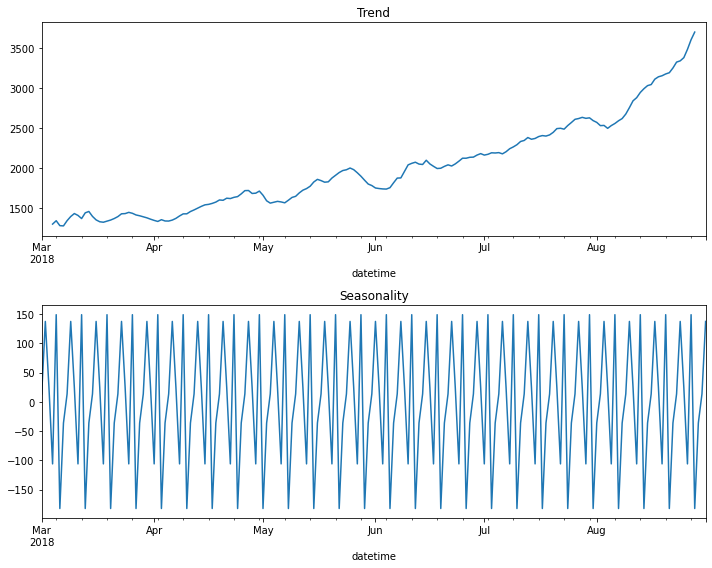

In [17]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
decomposed_1d.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(212)
decomposed_1d.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.tight_layout()

*График трендовой линий при ресемплировании по одному дню демострирует более плавный рост, характер тренда остался прежним.*

Text(0.5, 1.0, 'Seasonality')

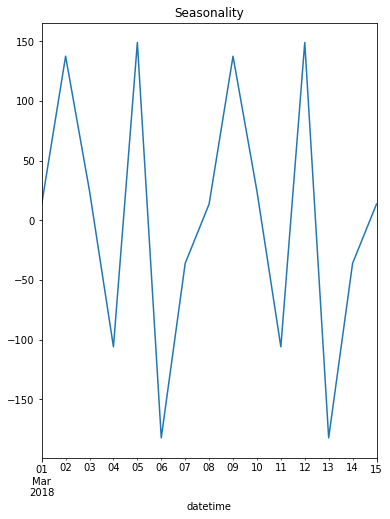

In [18]:
plt.figure(figsize=(6,8))
decomposed_1d.seasonal['2018-03-01':'2018-03-15'].plot(ax=plt.gca())
plt.title('Seasonality')

In [19]:
data1d['dayofweek'] = data1d.index.dayofweek

In [20]:
data1d.head(15)

,num_orders,dayofweek
datetime,,
2018-03-01,1364,3
2018-03-02,1506,4
2018-03-03,1290,5
2018-03-04,1141,6
2018-03-05,1259,0
2018-03-06,1109,1
2018-03-07,1441,2
2018-03-08,1659,3
2018-03-09,1076,4


*Проанализировав график сезонности, можно отметить следующие моменты: пользователи наименее активны по вторникам, пики активности приходится на понедельник и пятницу.*

### Вывод

Анализ временного ряда проводился на двух таймфреймах: часовом и дневном. На обоих таймфреймах наблюдается общая тенденция к увеличению количества заказов в течение наблюдаемого периода.

Рассматривая активность клиентов в течение одного дня (1h таймфрейм), можно отметить три пика активности: в утреннее, вечернее и ночное время.

Рассматривая активность клиентов в течение недели (1d таймфрейм), можно отметить следующие моменты: пользователи наименее активны по вторникам, пики активности приходится на понедельник и пятницу.

## Обучение

### Подготовка данных

*Для обучения модели напишем функцию, создающую признаки, включающие в себя информацию о дате, отстающих значениях и скользящем среднем.*

In [21]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].rolling(rolling_mean_size, closed='left').mean()

*Создадим признаки.*

In [22]:
make_features(data, 1, 24)

In [23]:
data.head()

,num_orders,dayofweek,hour,lag_1,rolling_mean
datetime,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN
2018-03-01 02:00:00,71,3,2,85.0,NaN
2018-03-01 03:00:00,66,3,3,71.0,NaN
2018-03-01 04:00:00,43,3,4,66.0,NaN


*Удалим строчки с пустыми значениями.*

In [24]:
data = data.dropna()

*Разделим датасет на выборки.*

In [25]:
features = data.drop('num_orders', axis=1)
target = data['num_orders']

In [26]:
features_train, features_test, target_train, target_test = train_test_split(features, target, shuffle=False, test_size=0.1)

### Обучение моделей

*Перед обучением модели зададим параметр разделения датафрейма для выполнения кросс-валидации.*

In [27]:
tscv = TimeSeriesSplit(n_splits=8)

In [28]:
def add_row(df, model_name, best_score):
    df.at[len(df), df.columns[0]] = model_name
    df.at[len(df) - 1, df.columns[1]] = best_score
    
    return df

In [29]:
results = pd.DataFrame(columns=['Модель', 'RMSE'])

#### LinearRegression

In [30]:
model_lm = LinearRegression()
mse = cross_val_score(model_lm, features_train, target_train, cv=tscv, scoring='neg_root_mean_squared_error')

In [31]:
print(f'RMSE для LinearRegression модели на валидационной выборке: {round((-mse.mean()), 2)}')

RMSE для LinearRegression модели на валидационной выборке: 31.34


In [32]:
add_row(results, 'LinearRegression', round((-mse.mean()), 2))

,Модель,RMSE
0,LinearRegression,31.34


#### LGBMRegressor

In [33]:
param = {
    'learning_rate': [0.1, 0.3, 0.5, 0.7],
    'max_depth': [15, 20, 30, 35]
             }

model_lgb = lgb.LGBMRegressor()

# инициализируем GridSearchCV
cv_lgb = GridSearchCV(estimator = model_lgb, 
                           param_grid = param, 
                           cv = tscv,
                           n_jobs = -1, 
                           verbose = 0, 
                           scoring = 'neg_root_mean_squared_error',
                          )
cv_lgb.fit(features_train, target_train)

print(cv_lgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 15}


In [34]:
print(f'RMSE для LightGBM модели на валидационной выборке: {round((-cv_lgb.best_score_), 2)}')

RMSE для LightGBM модели на валидационной выборке: 24.75


In [35]:
add_row(results, 'LightGBM', round((-cv_lgb.best_score_), 2))

,Модель,RMSE
0,LinearRegression,31.34
1,LightGBM,24.75


#### XGBRegressor

In [36]:
param = {
    'learning_rate': [0.1, 0.3, 0.5, 0.7],
    'max_depth': [15, 20, 30, 35],
    'n_estimators': [500]
             }

model_xgb = xgb.XGBRegressor()

# инициализируем GridSearchCV
cv_xgb = GridSearchCV(estimator = model_xgb, 
                           param_grid = param, 
                           cv = tscv,
                           n_jobs = -1, 
                           verbose = 0, 
                           scoring = 'neg_root_mean_squared_error',
                          )
cv_xgb.fit(features_train, target_train)

print(cv_xgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 500}


In [37]:
print(f'RMSE для XGB модели на валидационной выборке: {round((-cv_xgb.best_score_), 2)}')

RMSE для XGB модели на валидационной выборке: 27.19


In [38]:
add_row(results, 'XGBoost', round((-cv_xgb.best_score_), 2))

,Модель,RMSE
0,LinearRegression,31.34
1,LightGBM,24.75
2,XGBoost,27.19


### Вывод

В ходе выполнения данного этапа работы были написана функция, создающая признаки, включающие в себя информацию о дате, отстающих значениях и скользящем среднен; сгенерированы признаки.

В качестве моделей, прогнозирующих количество заказов в час, были рассмотрены следующие модели машинного обучения: LinearRegression, LGBRegressor и XGBRegressor. Лучший результат показала модель LGBRegressor со значением RMSE = 25.39. Эту модель и выберем в качестве основной модели.
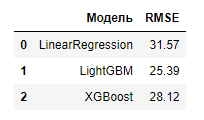

## Тестирование

### Тестирование модели

In [39]:
predicted = cv_lgb.best_estimator_.predict(features_test)

In [40]:
print(f'RMSE для LGBM модели на тестовой выборке: {round(mean_squared_error(target_test, predicted, squared=False), 2)}')

RMSE для LGBM модели на тестовой выборке: 43.03


### Проверка на адекватность

In [41]:
pred_previous = target_test.shift(fill_value=target_train.iloc[-1])
print(f'RMSE для Dummy модели на тестовой выборке: {round(mean_squared_error(target_test, pred_previous, squared=False), 2)}')

RMSE для Dummy модели на тестовой выборке: 58.88


### Графическая оценка результатов

*Построим графики предсказаний и фактического числа заказов для наглядной оценки качества предсказаний моделей.*

In [42]:
data_comp = pd.DataFrame()

In [43]:
data_comp['real'] = target_test

In [44]:
data_comp['predicted'] = predicted

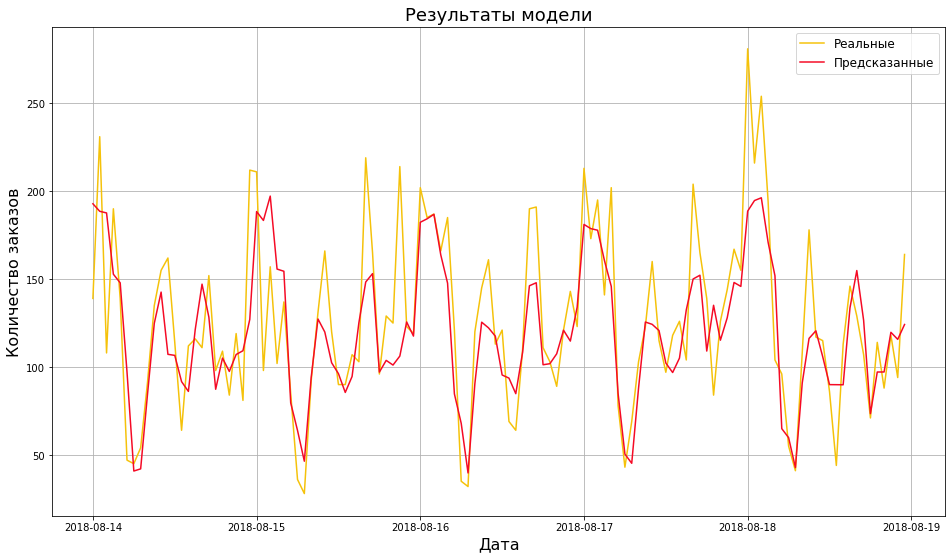

In [45]:
plt.figure(figsize=(16,9))
sns.lineplot(data=data_comp.loc['2018-08-14':'2018-08-18', 'real'], label='Реальные', color='#f5c20a')
sns.lineplot(data=data_comp.loc['2018-08-14':'2018-08-18', 'predicted'], label='Предсказанные', color='#f50a25')
plt.grid(True)
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Количество заказов', fontsize=16)
plt.legend(fontsize=12)
plt.title('Результаты модели', fontsize=18);

*Можно заметить, что модель хуже чувствует моменты, когда происходят резкие скачки. Плюс, заметим, что модель хуже определяет пиковые значения, чем донные.*

### Вывод

Выбранная модель на тестовой выборке показала RMSE = 43.03. Данный результат удовлетворяет требованиям, поэтому утвердим эту модель в качестве модели, отвечающей за прогнозирование. Проверку на адекватность модель также прошла.

## Общий вывод

В ходе выполнения данной работы был проведен анализ данных, были обучены модели.  Была выбрана лучшая модель, а также было проведено тестирование модели на соответствующей выборке.

Анализ временного ряда проводился на двух таймфреймах: часовом и дневном. На обоих таймфреймах наблюдается общая тенденция к увеличению количества заказов в течение наблюдаемого периода.

Рассматривая активность клиентов в течение одного дня (1h таймфрейм), можно отметить три пика активности: в утреннее, вечернее и ночное время.
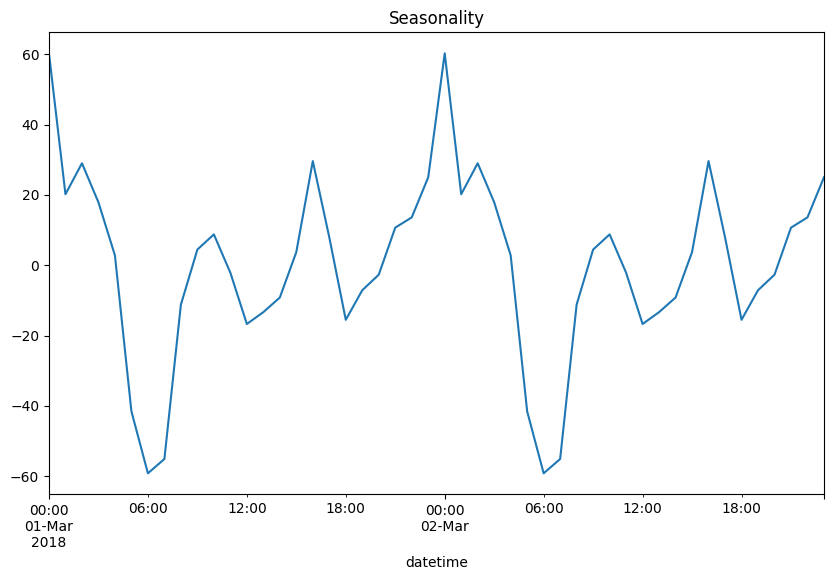

Рассматривая активность клиентов в течение недели (1d таймфрейм), можно отметить следующие моменты: пользователи наименее активны по вторникам, пики активности приходится на понедельник и пятницу.
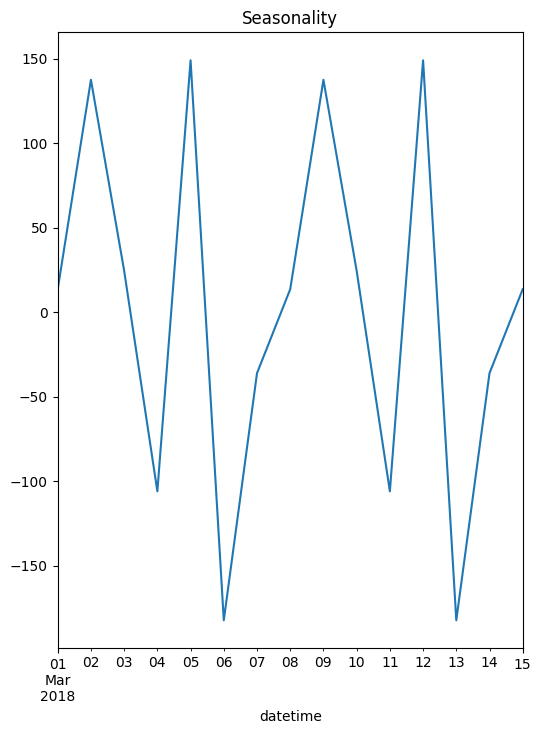

В ходе выполнения данного этапа работы были написана функция, создающая признаки, включающие в себя информацию о дате, отстающих значениях и скользящем среднен; сгенерированы признаки.

В качестве моделей, прогнозирующих количество заказов в час, были рассмотрены следующие модели машинного обучения: LinearRegression, LGBRegressor и XGBRegressor. Лучший результат показала модель LGBRegressor со значением RMSE = 25.39. Эту модель и выберем в качестве основной модели.

Выбранная модель на тестовой выборке показала RMSE = 43.03. Данный результат удовлетворяет требованиям, поэтому утвердим эту модель в качестве модели, отвечающей за прогнозирование. Проверку на адекватность модель также прошла.
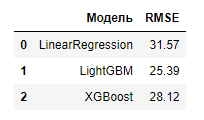

Была проведена графическая оценка качества предсказаний модели. Можно заметить, что модель хуже чувствует моменты, когда происходят резкие скачки. Плюс, заметим, что модель хуже определяет пиковые значения, чем донные.
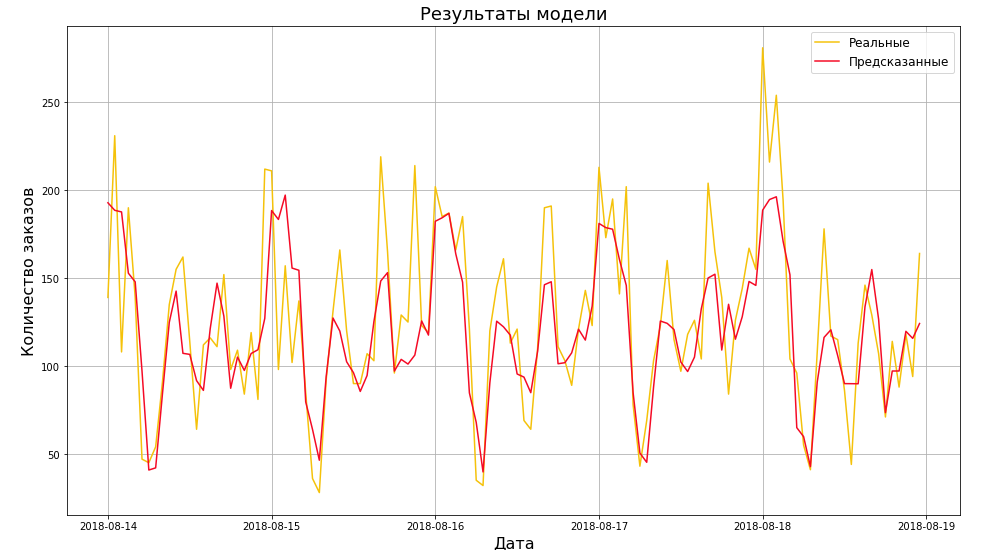